# Preliminary Setup

In [9]:
import torch
import numpy as np
import datasets
import os
import sys
import math
import seaborn as sns
from pathlib import Path
from IPython.core.debugger import set_trace
from datasets import Dataset, DatasetDict
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
#from tqdm import tqdm

# local imports
from nbtools.utils import files

datasets.disable_caching()

cache_dir = f'{files.project_root()}/cache'

# Set this to whatever you want
seed = 10

torch.manual_seed(seed)
np.random.seed(seed)

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ch 1.2

# Sketch the Function

$ f(x) = \frac{x^3 - 1}{x-1} $

Note that this function is undefined at $x = 1$, i.e., there is a hole at $(1, 3)$

This can be defined as  
$ \lim\limits_{x \rightarrow 1} f(x) = 3 $

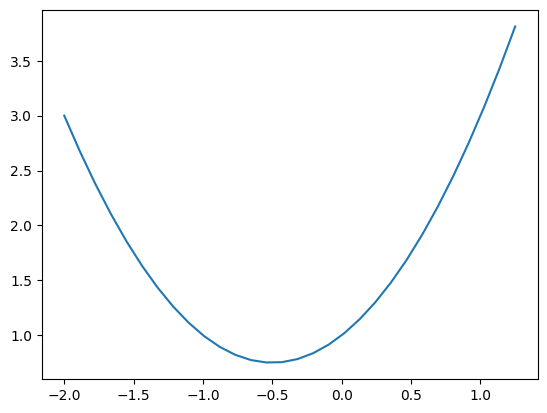

In [6]:
f = lambda x: (x**3 - 1)/(x - 1)

x = np.linspace(-2, 1.25, 30)
y = f(x)
plt.plot(x, y)
plt.show()

# Limits

The **limit** of $f(x)$ as $x$ approaches $c$ is $L$. Written as:  

$ \lim\limits_{x \rightarrow c} f(x) = L $


# Page 52 Exploration

The discussion above gives an example of how you can estimate a limit  
numerically by constructing a table and graphically by drawing a graph.  
Estimate the following limit numerically by completing the table.  

$ \lim\limits_{x \rightarrow 2} \frac{x^2-3x+2}{x-2} $

| | | | | | | | | | |
|-|-|-|-|-|-|-|-|-|-|
| $x$ | 1.75 | 1.9 | 1.99 | 1.999 | 2 | 2.001 | 2.01 | 2.1 | 2.25 |
| $f(x)$ | 0.75 | 0.9 | 0.99 | 0.999 | NaN | 1.001 | 1.01 | 1.1 | 1.25 |

So then $ \lim\limits_{x \rightarrow 2} \frac{x^2-3x+2}{x-2} = 1 $

x: [1.75  1.9   1.99  1.999 2.    2.001 2.01  2.1   2.25 ]
y: [0.75  0.9   0.99  0.999   nan 1.001 1.01  1.1   1.25 ]


/tmp/ipykernel_1643837/26090499.py:1: RuntimeWarning: invalid value encountered in divide
  f = lambda x: (x**2 - 3*x + 2)/(x-2)


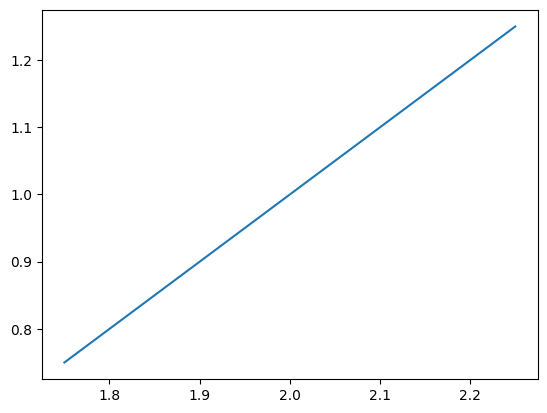

In [8]:
f = lambda x: (x**2 - 3*x + 2)/(x-2)

x = np.array([1.75, 1.9, 1.99, 1.999, 2, 2.001, 2.01, 2.1, 2.25])
y = f(x)

print(f'x: {x}')
print(f'y: {y}')

plt.plot(x, y)
plt.show()

# Ch 1.2 Page 55 Oscillating Behaviour

Discuss the existence of the limit  

$ \lim\limits_{x \rightarrow 0} \sin\left(\frac{1}{x}\right) $

| | | | | | | | |
|-|-|-|-|-|-|-|-|
| x |
| $\sin\frac{1}{x}$ |

[0.63661977 0.21220659 0.12732395 0.09094568 0.07073553 0.05787452]
[ 1. -1.  1. -1.  1. -1.]


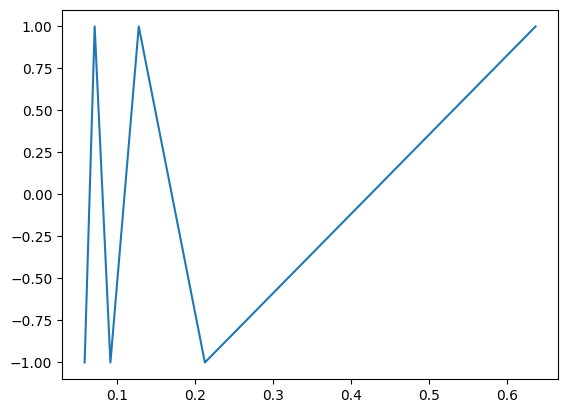

In [13]:
pi = math.pi
f = lambda x: np.sin(1/x)

x = 2/(pi*np.arange(1, 12, 2))
y = f(x)

print(x)
print(y)

plt.plot(x, y)
plt.show()

# Definition of a Limit

Let $f$ be a function defined on an open interval containing $c$ (except possibly at $c$),  
and let $L$ be a real number. The statement

$ \lim\limits_{x \rightarrow c} f(x) = L $

means that for each $\varepsilon > 0$ there exists a $\delta > 0$ such that if
$ 0 < | x - c | < \delta $

then  
$ | f(x) - L | < \varepsilon $

Basically, **a limit definition says that there is always a solution to the function $f(x)$ no matter how close you get to $c$**